The data shall be cleaned through the following processes
1. Checking the number of columns
2. Changing mispelst column names to the correct names
3. Checking for missing values
4. Checking for duplicate values
5. Checking for outliers

In [2]:
# importing necessary libraries
import pandas as pd
import seaborn as sns

In [6]:
# read the file
df = pd.read_csv("diabetes_unclean.csv")

In [9]:
# top records of the dataset
df.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [11]:
# checking for number of columns
df.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [36]:
# rename the column "No_Pation" to "Patients_No"
df.rename(columns={"No_Pation":"Patients_No"}, inplace=True)

In [38]:
# confirm the change
df.columns

Index(['ID', 'Patients_No', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol',
       'TG', 'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [40]:
# to check for the missing values
df.isnull().sum()

ID             0
Patients_No    0
Gender         0
AGE            1
Urea           1
Cr             2
HbA1c          3
Chol           2
TG             2
HDL            1
LDL            2
VLDL           1
BMI            0
CLASS          0
dtype: int64

In [42]:
# replace the missing values in the column "HbA1c"
mean_value = df["HbA1c"].mean()
mean_value

8.284155069582505

In [44]:
# using the mean value to replace the missing records
df["HbA1c"].fillna(mean_value, inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_16880\1342451423.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["HbA1c"].fillna(mean_value, inplace=True)


In [46]:
# dropping the missing values of other columns
df1 = df.dropna()
df1.isnull().sum()

ID             0
Patients_No    0
Gender         0
AGE            0
Urea           0
Cr             0
HbA1c          0
Chol           0
TG             0
HDL            0
LDL            0
VLDL           0
BMI            0
CLASS          0
dtype: int64

In [48]:
# check for information concerning the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           997 non-null    int64  
 1   Patients_No  997 non-null    int64  
 2   Gender       997 non-null    object 
 3   AGE          997 non-null    float64
 4   Urea         997 non-null    float64
 5   Cr           997 non-null    float64
 6   HbA1c        997 non-null    float64
 7   Chol         997 non-null    float64
 8   TG           997 non-null    float64
 9   HDL          997 non-null    float64
 10  LDL          997 non-null    float64
 11  VLDL         997 non-null    float64
 12  BMI          997 non-null    float64
 13  CLASS        997 non-null    object 
dtypes: float64(10), int64(2), object(2)
memory usage: 116.8+ KB


In [50]:
df1.groupby('CLASS')['CLASS'].agg("count")

CLASS
N     102
N       1
P      53
Y     832
Y       9
Name: CLASS, dtype: int64

In [52]:
# check for the unique values in the column "CLASS"
df['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [54]:
# to clean the columns, i replace the unique values
df1["CLASS"] = df1["CLASS"].str.replace("Y ","Y")
df1["CLASS"] = df1["CLASS"].str.replace("N ","N")

C:\Users\USER\AppData\Local\Temp\ipykernel_16880\3938125816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CLASS"] = df1["CLASS"].str.replace("Y ","Y")
C:\Users\USER\AppData\Local\Temp\ipykernel_16880\3938125816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["CLASS"] = df1["CLASS"].str.replace("N ","N")


In [56]:
# to confirm the change
df1['CLASS'].unique()

array(['N', 'P', 'Y'], dtype=object)

<Axes: ylabel='Cr'>

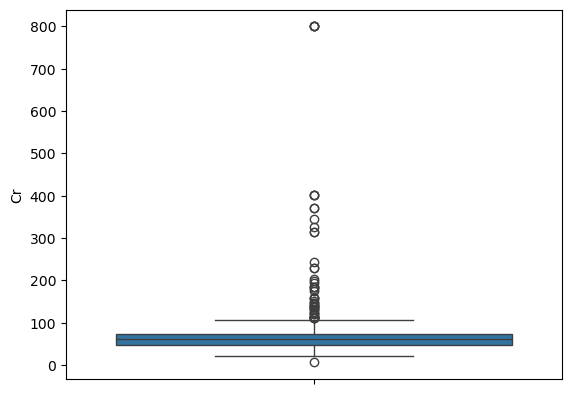

In [58]:
# checking for outliers in the dataset. outliers are values that are hyped
sns.boxplot(df1["Cr"])

In [60]:
# to deal with the outliers choose the maximum quantile to fill in the outliers
max_cr = df1["Cr"].quantile(0.995)
max_cr

401.0

In [64]:
df1[df1["Cr"] > max_cr]

,ID,Patients_No,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
273,1,34325,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
283,266,24060,M,58.0,20.8,800.0,9.1,6.6,2.9,1.1,4.3,1.3,33.0,Y
846,1,34325,M,56.0,20.8,800.0,9.0,4.6,2.0,1.2,2.5,0.9,35.0,Y
860,19,51623,M,60.0,20.8,800.0,9.0,2.3,1.1,0.9,0.9,0.5,33.0,Y


In [66]:
# assigning the new data to the new dataframe
df2 = df1[df1["Cr"] < max_cr]

<Axes: ylabel='Cr'>

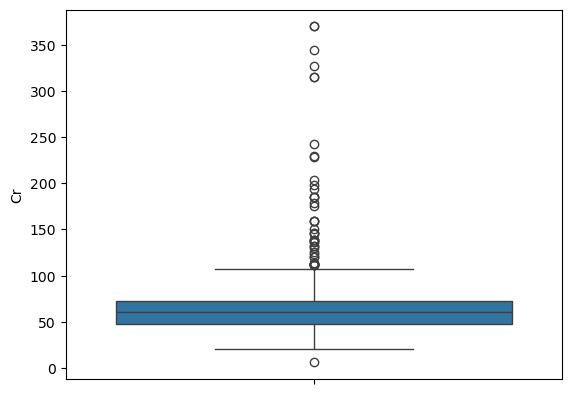

In [68]:
# to confirm the change
sns.boxplot(df2["Cr"])

In [70]:
# checking for duplicate values
df2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1002     True
1003     True
1005    False
1007    False
1008     True
Length: 990, dtype: bool

In [72]:
# eliminating duplicate values by dropping them
df3 = df2.drop_duplicates()

In [74]:
# to confirm the changes
df3.duplicated().sum()

0

In [76]:
# saving the new dataset into a csv file
df3.to_csv("Cleaned_data2.csv")